In [1]:
import pandas as pd
import numpy as np
from sa_clusters import Clusters

In [ ]:
# in order to effectivley backtest the stat arb strategy
# we need to get data during the appropriate time periods
# this notebook pulls historical data that allow us to generate
# new stock clusters at the begining of each month 
# we find the constituents at any given date
# and pull the historical information from that month 

In [2]:
# this list coontains the constituents of the s&p 500 and given dates from 1996
stocks = pd.read_csv('data/constituents/historical_constituents.csv')
stocks.head()

,date,tickers
0,1996-01-02,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1,1996-01-03,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
2,1996-01-04,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
3,1996-01-10,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
4,1996-01-11,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."


In [3]:
# this list contains the trading days at the start of each month since 2000
cluster_dates = pd.read_csv('data/clusters/first_trading_day_monthly_2001.csv')
cluster_dates.head()

,Date
0,1/3/00
1,2/1/00
2,3/1/00
3,4/3/00
4,5/1/00


In [4]:
s = stocks.iloc[-1]['tickers'].split(",")

In [5]:
def get_stock_info(ticker):
    # API sandbox token
    api_token = 'Tpk_54a84cc3f80f41e395e683e466e1c51b'
    # test using sandbox 
    base_url = 'https://sandbox.iexapis.com/'
    # Always use "stable" to use current version
    version = 'stable/'
    # Endpoint path depends on specific request
    # Balance Sheet: /stock/{symbol}/balance-sheet/{last}/{field}
    # Quote: /stock/{symbol}/quote/{field} 
    # above {symbol} is required but {last} or {field} are optional
    endpoint_path = '/stock/{}/advanced-stats'.format(ticker)
    # Querey string requires token 
    querey_string = '?token='
    url = base_url + version + endpoint_path + querey_string + api_token
    response = requests.get(url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None
    
    
    #https://sandbox.iexapis.com/v1/stock/market/batch?types=chart,splits,news&symbols=aapl,goog,fb&range=5y &token=YOUR_TEST_TOKEN_HERE



In [6]:
def stock_info(df):
    for i in range(len(df)):
        if i == 0:
            ticker = df[i]
            info = get_stock_info(ticker)
            cols = list(info.keys())
            stocks = pd.DataFrame(columns=cols)
            stocks.at[i] = list(info.values())
        else:
            ticker = df[i]
            info = get_stock_info(ticker)
            stocks.at[i] = list(info.values())
    return stocks

In [8]:
'''
data = stock_info(s)
data['Symbol'] = s
data = data.set_index('Symbol')
data = data.drop(['week52highDate', 
                  'week52lowDate', 
                  'nextDividendDate', 
                  'exDividendDate', 
                  'nextEarningsDate', 
                  'week52lowDateSplitAdjustOnly', 
                  'week52highDateSplitAdjustOnly', 
                  'companyName'], axis=1)
'''

"\ndata['Symbol'] = s\ndata = data.set_index('Symbol')\ndata = data.drop(['week52highDate', \n                  'week52lowDate', \n                  'nextDividendDate', \n                  'exDividendDate', \n                  'nextEarningsDate', \n                  'week52lowDateSplitAdjustOnly', \n                  'week52highDateSplitAdjustOnly', \n                  'companyName'], axis=1)\n"

In [10]:
clust = Clusters('data/iex_eg.csv')

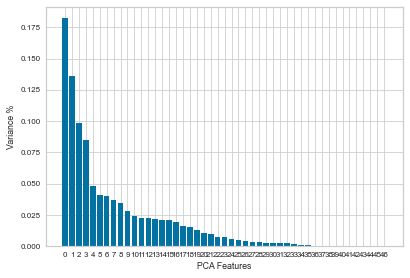

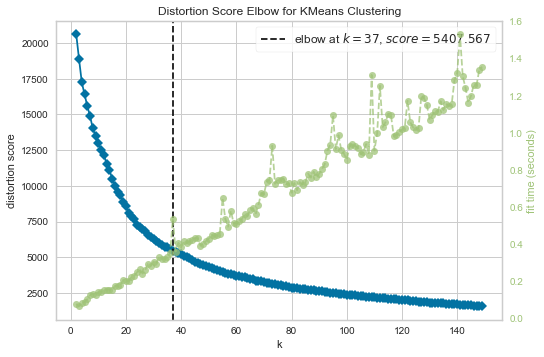

In [11]:
clust.create()